In [1]:
!date

Fri Jul 23 19:10:04 PDT 2021


# Matrix Generation Clean Up

In [2]:
!pip install anndata
!pip install scanpy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import scanpy as scanp
from scipy.stats import ks_2samp, ttest_ind
from scipy.sparse import csr_matrix, lil_matrix
from sklearn.preprocessing import normalize
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from matplotlib import cm

def nd(arr):
    return np.array(arr).reshape(-1)

import warnings
warnings.filterwarnings('ignore')

fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

/home/nmarkari/.local/lib/python3.6/site-packages/numba/core/errors.py:154: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [4]:
#!wget -O adata.h5ad https://caltech.box.com/shared/static/5t1nzojh9agwpbwchbvf73rpr133uyk0.h5ad

In [5]:
#adata = "../../data/preprocessed/Yao/SS4/ACA/adata.h5ad"
#adata = "adata.h5ad"
#adata = anndata.read_h5ad(adata)

#adata.var["gene_name"] = adata.var["gene_name"].astype(str) + "_" + adata.var.gene_id.astype(str)
#adata.var["transcript_name"] = adata.var["transcript_name"].astype(str) + "_" + adata.var.transcript_id.astype(str)

In [6]:
!ls '../../data/preprocessed/Yao/SS4/'
#ACA is incomplete, will not be used

ACA  AI  ENTl  ENTm  HIP  KB_HIP_TEST  ORB  PL-ILA  RSP  SUB-ProS  TEa-PERI-ECT


In [7]:
adata = anndata.read_h5ad('../../data/preprocessed/Yao/SS4/HIP/adata.h5ad')
var = adata.var
for region in ['ORB','ENTm','ENTl','SUB-ProS','AI','PL-ILA','TEa-PERI-ECT','RSP']:
    adata_tmp = anndata.read_h5ad('../../data/preprocessed/Yao/SS4/'+region+'/adata.h5ad')
    adata = anndata.concat([adata,adata_tmp])
adata.var = var

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [8]:
#adata = anndata.read_h5ad('../../data/preprocessed/Yao/SS4/HIP/adata.h5ad')
#adata.obs

In [9]:
#adata.var

In [10]:
#adata.obs.region_label.value_counts()

In [11]:
def change(x):
    if x=="L5 ET": return "L5 PT"
    return x

In [12]:
len(adata.obs.index)

18899

In [13]:
adata.obs_names_make_unique()

In [14]:
adata.obs.subclass_label.value_counts()

DG               2472
CA1-ProS         1704
Lamp5            1483
Vip              1421
Sst              1259
L4/5 IT CTX      1052
L2/3 IT CTX       919
L6 CT CTX         871
Sncg              758
L6b/CT ENT        656
Pvalb             647
L6 IT CTX         621
L3 IT ENT         593
L2/3 IT PPP       513
SUB-ProS          467
Car3              436
L5 NP CTX         332
L2/3 IT ENTl      329
CA3               322
L5 IT CTX         289
L5 IT TPE-ENT     274
NP SUB            253
L2  IT ENTl       185
Astro             146
L6b CTX           136
L2/3 IT RHP       131
CT SUB            128
L5 PT CTX          98
L4 RSP-ACA         83
L6 IT ENTl         77
Meis2              71
L2 IT ENTm         42
Sst Chodl          37
Micro-PVM          30
NP PPP             29
IG-FC              19
L5 PPP              9
Oligo               5
CR                  2
Name: subclass_label, dtype: int64

In [15]:
!wget -O length_info.txt https://caltech.box.com/shared/static/au1kv43nz2v0xcspyfs3s63ooo882gcr.txt

--2021-07-23 19:10:42--  https://caltech.box.com/shared/static/au1kv43nz2v0xcspyfs3s63ooo882gcr.txt
Resolving caltech.box.com (caltech.box.com)... 107.152.25.197
Connecting to caltech.box.com (caltech.box.com)|107.152.25.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/au1kv43nz2v0xcspyfs3s63ooo882gcr.txt [following]
--2021-07-23 19:10:42--  https://caltech.box.com/public/static/au1kv43nz2v0xcspyfs3s63ooo882gcr.txt
Reusing existing connection to caltech.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://caltech.app.box.com/public/static/au1kv43nz2v0xcspyfs3s63ooo882gcr.txt [following]
--2021-07-23 19:10:42--  https://caltech.app.box.com/public/static/au1kv43nz2v0xcspyfs3s63ooo882gcr.txt
Resolving caltech.app.box.com (caltech.app.box.com)... 107.152.25.201
Connecting to caltech.app.box.com (caltech.app.box.com)|107.152.25.201|:443... connected.
HTTP request sent, awaiting response... 3

In [16]:
lengths = pd.read_csv("length_info.txt", header=None, names=["length", "transcript_id", "gene_id", "gene_name", "transcript_name", "chr", "start", "end", "strand"], sep="\t")
#lengths["transcript_id"] = lengths["transcript_id"].apply(lambda x: x.split(".")[0])
lengths.index = lengths.transcript_id.values

In [17]:
adata.var["transcript_name"] = adata.var.transcript_id.map(lengths["transcript_name"].apply(lambda x: x.split(":")[1]))
adata.var["length"] = adata.var.transcript_id.map(lengths["length"])
adata.var["gene_name"] = adata.var.transcript_id.map(lengths["gene_name"].apply(lambda x: x.split(":")[1]))
adata.var["gene_id"] = adata.var.transcript_id.map(lengths["gene_id"].apply(lambda x: x.split(":")[1]))
adata.var["gene_name"] = adata.var["gene_name"].astype(str) + "_" + adata.var.gene_id.astype(str)
adata.var["transcript_name"] = adata.var["transcript_name"].astype(str) + "_" + adata.var.transcript_id.astype(str)
adata.var.head()


,transcript_id,gene_id,gene_name,transcript_name,length
0,ENSMUST00000193198.2,ENSMUSG00000102628.2,Gm37671_ENSMUSG00000102628.2,Gm37671-201_ENSMUST00000193198.2,2096
1,ENSMUST00000191430.2,ENSMUSG00000100595.2,Gm19087_ENSMUSG00000100595.2,Gm19087-201_ENSMUST00000191430.2,946
2,ENSMUST00000181451.2,ENSMUSG00000097426.2,Gm8941_ENSMUSG00000097426.2,Gm8941-201_ENSMUST00000181451.2,899
3,ENSMUST00000194081.2,ENSMUSG00000104478.2,Gm38212_ENSMUSG00000104478.2,Gm38212-201_ENSMUST00000194081.2,2756
4,ENSMUST00000194393.2,ENSMUSG00000104385.2,Gm7449_ENSMUSG00000104385.2,Gm7449-201_ENSMUST00000194393.2,663


In [18]:
raw = adata.X.todense()

In [19]:
raw

matrix([[ 0.     ,  1.03536,  0.     , ...,  0.     ,  0.     ,  5.     ],
        [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,  0.     ],
        [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,  1.     ],
        ...,
        [ 0.     ,  0.     ,  1.     , ...,  0.     ,  0.     , 14.     ],
        [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,  6.     ],
        [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     , 13.     ]],
       dtype=float32)

In [20]:
x = nd(raw.sum(axis=1))

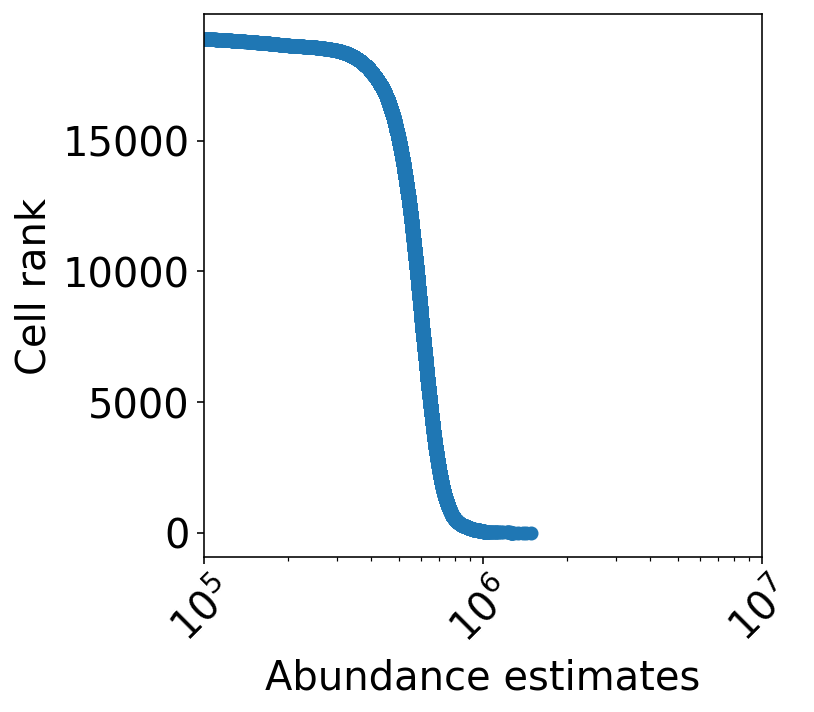

In [21]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(np.sort(x)[::-1], np.arange(x.shape[0]))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlim([100000,10000000])
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    
ax.set(**{
    "xlabel": "Abundance estimates",
    "ylabel": "Cell rank",
    "xscale": "log"
})

fig.show()

# Basic matrix transforms

Isoform counts divided by length of transcripts? #nick

In [22]:
scaled = raw/adata.var.length.values

normalize to TPM, sklearn's normalize scales to have unit norm #nick

In [23]:
adata.layers["raw"] = csr_matrix(raw)
adata.layers["scaled"] = csr_matrix(scaled)

adata.layers["norm"] = normalize(scaled, norm='l1', axis=1)*1000000

In [24]:
adata.layers["norm"][0].sum()

1000000.0000000001

In [25]:
adata.layers["log1p"] = np.log1p(adata.layers["norm"])

In [26]:
del raw
del scaled

In [27]:
def group_mtx(mtx, components, features, s2t, source_id="transcript_id", target_id="gene_id", by="features"):
    """
    mtx: ndarray components by features 
    components: labels for rows of mtx
    features: labels for columns of mtx
    s2t: pandas dataframe mapping source (features or components) to a
    targets features(components) to group by
    target_id: column name in s2t to group by
    """
    if target_id not in s2t.columns: return -1
    
    ncomp   = components.shape[0]
    nfeat   = features.shape[0]
    ntarget = s2t[target_id].nunique()
    
    if by =="features": 
        source = features
    elif by =="components": 
        source = components
    
    # Map the source to an index
    source2idx = dict(zip(source, range(len(source))))
    # Map the target to a list of source indices
    target2idx = (s2t.groupby(target_id)[source_id].apply(lambda x: [source2idx[i] for i in x])).to_dict()
    
    # array of unique targets
    unique = s2t[target_id].unique().astype(str)
    nuniq = unique.shape[0]
    X = np.zeros((ncomp, nuniq))
    
    for tidx, t in enumerate(unique):
        # Grab the matrix indices corresponding to columns and source columns to group by
        source_indices = target2idx[t]
        
        # breaks generality
        sub_mtx = mtx[:, source_indices].sum(axis=1) # Sum on source indicies
        X[:,tidx] = np.asarray(sub_mtx)[:,0] # place summed vector in new matrix
        
    # Return matrix that is grouped by
    return (X, components, unique)
    
def filter_mtx(mtx, components, features, **kwargs):
    row_counts = kwargs.get("row_counts", 0) # threshold for min counts for rows
    col_counts = kwargs.get("col_counts", 0)
    row_zeros  = kwargs.get("row_zeros", 0) # threshold min number of non_zero entries in rows
    col_zeros  = kwargs.get("col_zeros", 0)
    
    return_mask = kwargs.get("return_mask", False)
    
    row_sum = np.asarray(mtx.sum(axis=1)).reshape(-1) # sum along the rows
    col_sum = np.asarray(mtx.sum(axis=0)).reshape(-1)
    
    mtx_zero_mask = mtx>0
    row_nz = np.asarray(mtx_zero_mask.sum(axis=1)).reshape(-1)
    col_nz = np.asarray(mtx_zero_mask.sum(axis=0)).reshape(-1)
    
    # Generate masks
    rs_mask = row_sum > row_counts
    cs_mask = col_sum > col_counts
    
    rz_mask = row_nz > row_zeros
    cz_mask = col_nz > col_zeros
    
    row_mask = np.logical_and(rs_mask, rz_mask)
    col_mask = np.logical_and(cs_mask, cz_mask)
    
    if return_mask:
        return (row_mask, col_mask)
    
    X = mtx[row_mask,:][:,col_mask]
    c = components[row_mask]
    f = features[col_mask]
    
    return (X, c, f)

### test the filter step

In [28]:
%%time

mtx = np.array([[1,1,0],
                [0,1,0],
                [3,0,0],
                [0,2,0]])

components = np.array([1,2,3,4])
features = np.array([1, 2, 3])

X, c, f = filter_mtx(mtx, components, features, row_zeros=1, col_zeros=3)
rm, cmask = filter_mtx(mtx, components, features, return_mask=True)

CPU times: user 318 µs, sys: 96 µs, total: 414 µs
Wall time: 381 µs


In [29]:
print(cmask)
print(X)
print(X==mtx)

[ True  True False]
[]
False


# Group isoforms into genes, and filter. 

go back and filter on isoforms and apply it to genes

In [30]:
%%time

mtx        = adata.layers["scaled"] # sum scaled abundances
components = adata.obs.cell_id.values
features   = adata.var.transcript_id.values


rm, cmask = filter_mtx(mtx, components, features, col_counts=1, col_zeros=1, return_mask=True)

CPU times: user 4.87 s, sys: 1.5 s, total: 6.37 s
Wall time: 6.36 s


In [31]:
cmask.sum()

82195

# Save the raw isoform and gene matrix

In [32]:
adata

AnnData object with n_obs × n_vars = 18899 × 142434
    obs: 'cell_id', 'cluster_id', 'cluster_label', 'subclass_id', 'subclass_label', 'region_label', 'class_label', 'cluster_color', 'class_id'
    var: 'transcript_id', 'gene_id', 'gene_name', 'transcript_name', 'length'
    layers: 'raw', 'scaled', 'norm', 'log1p'

In [33]:
%%time

mtx        = adata.layers["scaled"].todense()
components = adata.obs.cell_id.values
features   = adata.var.transcript_id.values

source_id = "transcript_id"
target_id = "gene_id"


s2t = adata.var

# Data for gene matrix
X, c, f = group_mtx(mtx, components, features, s2t)

CPU times: user 2min 7s, sys: 28.2 s, total: 2min 36s
Wall time: 2min 36s


In [34]:
# generate gene
tmp = adata.var.drop_duplicates(["gene_id", "gene_name"])
tmp = tmp[tmp.gene_id.isin(f)]
gene = anndata.AnnData(X=X, obs=adata.obs, var=tmp)

In [35]:
print(adata)
print(gene)

AnnData object with n_obs × n_vars = 18899 × 142434
    obs: 'cell_id', 'cluster_id', 'cluster_label', 'subclass_id', 'subclass_label', 'region_label', 'class_label', 'cluster_color', 'class_id'
    var: 'transcript_id', 'gene_id', 'gene_name', 'transcript_name', 'length'
    layers: 'raw', 'scaled', 'norm', 'log1p'
AnnData object with n_obs × n_vars = 18899 × 55416
    obs: 'cell_id', 'cluster_id', 'cluster_label', 'subclass_id', 'subclass_label', 'region_label', 'class_label', 'cluster_color', 'class_id'
    var: 'transcript_id', 'gene_id', 'gene_name', 'transcript_name', 'length'


In [36]:
adata.write_h5ad("../../data/notebook/revision/no_filter_smartseq_isoform.h5ad")
gene.write_h5ad("../../data/notebook/revision/no_filter_smartseq_gene.h5ad")

... storing 'cluster_label' as categorical
... storing 'subclass_label' as categorical
... storing 'region_label' as categorical
... storing 'class_label' as categorical
... storing 'cluster_color' as categorical
... storing 'gene_id' as categorical
... storing 'gene_name' as categorical
... storing 'cluster_label' as categorical
... storing 'subclass_label' as categorical
... storing 'region_label' as categorical
... storing 'class_label' as categorical
... storing 'cluster_color' as categorical


# Filter isoform and gene matrix 

In [37]:
filtered_adata = adata[:,cmask]

In [38]:
print(filtered_adata)
print(adata)

View of AnnData object with n_obs × n_vars = 18899 × 82195
    obs: 'cell_id', 'cluster_id', 'cluster_label', 'subclass_id', 'subclass_label', 'region_label', 'class_label', 'cluster_color', 'class_id'
    var: 'transcript_id', 'gene_id', 'gene_name', 'transcript_name', 'length'
    layers: 'raw', 'scaled', 'norm', 'log1p'
AnnData object with n_obs × n_vars = 18899 × 142434
    obs: 'cell_id', 'cluster_id', 'cluster_label', 'subclass_id', 'subclass_label', 'region_label', 'class_label', 'cluster_color', 'class_id'
    var: 'transcript_id', 'gene_id', 'gene_name', 'transcript_name', 'length'
    layers: 'raw', 'scaled', 'norm', 'log1p'


In [39]:
%%time

mtx        = filtered_adata.layers["scaled"].todense()
components = filtered_adata.obs.cell_id.values
features   = filtered_adata.var.transcript_id.values

source_id = "transcript_id"
target_id = "gene_id"


s2t = filtered_adata.var

# Data for gene matrix
X, c, f = group_mtx(mtx, components, features, s2t)

CPU times: user 1min 13s, sys: 24.8 s, total: 1min 38s
Wall time: 1min 38s


In [40]:
# generate isoform based on gene mask.
isoform = filtered_adata[:, filtered_adata.var.gene_id.isin(f)]

In [41]:
isoform

View of AnnData object with n_obs × n_vars = 18899 × 82195
    obs: 'cell_id', 'cluster_id', 'cluster_label', 'subclass_id', 'subclass_label', 'region_label', 'class_label', 'cluster_color', 'class_id'
    var: 'transcript_id', 'gene_id', 'gene_name', 'transcript_name', 'length'
    layers: 'raw', 'scaled', 'norm', 'log1p'

In [42]:
# generate gene
tmp = filtered_adata.var.drop_duplicates(["gene_id", "gene_name"])
tmp = tmp[tmp.gene_id.isin(f)]
gene = anndata.AnnData(X=X, obs=filtered_adata.obs, var=tmp)

In [43]:
print(isoform)
print(gene)

View of AnnData object with n_obs × n_vars = 18899 × 82195
    obs: 'cell_id', 'cluster_id', 'cluster_label', 'subclass_id', 'subclass_label', 'region_label', 'class_label', 'cluster_color', 'class_id'
    var: 'transcript_id', 'gene_id', 'gene_name', 'transcript_name', 'length'
    layers: 'raw', 'scaled', 'norm', 'log1p'
AnnData object with n_obs × n_vars = 18899 × 26802
    obs: 'cell_id', 'cluster_id', 'cluster_label', 'subclass_id', 'subclass_label', 'region_label', 'class_label', 'cluster_color', 'class_id'
    var: 'transcript_id', 'gene_id', 'gene_name', 'transcript_name', 'length'


In [44]:
gene.var.index = gene.var.gene_name.values
isoform.var.index = isoform.var.transcript_name.values

In [45]:
x = nd(isoform.layers["scaled"].sum(axis=1))

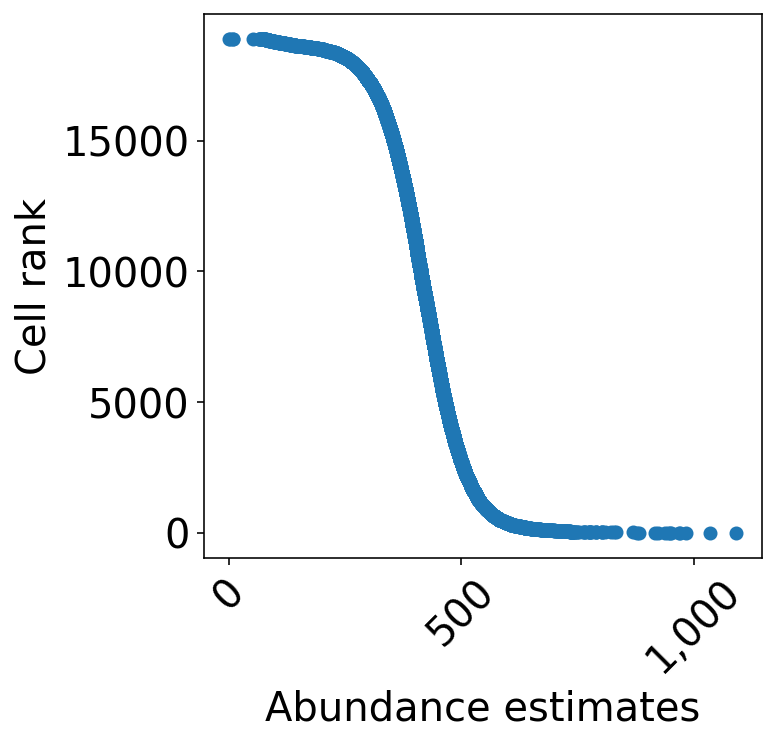

In [46]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(np.sort(x)[::-1], np.arange(x.shape[0]))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    
ax.set(**{
    "xlabel": "Abundance estimates",
    "ylabel": "Cell rank",
})

fig.show()

# Begin Check

In [47]:
# the gene_id is OK, need to fix the gene name to reflected the fact that
# the same gene_name is used with multiple gene_ids

In [48]:
filtered_adata.var.gene_id.nunique() == gene.var.gene_name.nunique()

True

In [49]:
filtered_adata.var.transcript_id.nunique() == isoform.var.transcript_name.nunique()

True

In [50]:
gene.X = csr_matrix(gene.X)

In [51]:
gene.layers["scaled"] = gene.X.copy() # here, X is rho, the number of molecules

# Perform matrix operations

In [52]:
num_TSNE = 2
state = 42
metric = "euclidean"
n_neighbors = 30
num_PCA = 50
num_NCA = 10

# Filtering criteria
cell_threshold = 250
disp_threshold = 0.001

mito_criteria = 10

n_top_genes = 5000

n_bins = 20

flavor="seurat"

scale_clip = 10

### Adding info to rows/cols

In [53]:
# turning subclass_label into an id
le = LabelEncoder()
gene.obs["subclass_id"] = le.fit_transform(gene.obs.subclass_label.values)
isoform.obs["subclass_id"] = le.fit_transform(isoform.obs.subclass_label.values)

Trying to set attribute `.obs` of view, copying.


In [54]:
# turning class_label into an id
le = LabelEncoder()
gene.obs["class_id"] = le.fit_transform(gene.obs.class_label.values)
isoform.obs["class_id"] = le.fit_transform(isoform.obs.class_label.values)

In [55]:
gene.var["gene_id"] = gene.var["gene_id"].astype(str)

In [56]:
# Adding list and number of isoforms to each gene
g2t = isoform.var.groupby("gene_id")["transcript_id"].apply(list)
gene.var["txn_list"] = gene.var["gene_id"].map(g2t)
num_iso = g2t.apply(lambda x: len(x))
gene.var["num_isoforms"] = gene.var["gene_id"].map(num_iso).astype(int)

In [57]:
# Writing cell_TPM, gene_TPM, n_genes, and percent_mito for each cell
gene.obs["cell_counts"] = gene.X.sum(1)
gene.var["gene_counts"] = np.asarray(gene.X.sum(0)).reshape(-1)

isoform.obs["cell_counts"] = isoform.X.sum(1)
isoform.var["gene_counts"] = np.asarray(isoform.X.sum(0)).reshape(-1)

mito_genes = gene.var_names.str.startswith('mt-')
gene.obs["percent_mito"] = gene[:,mito_genes].X.sum(axis=1)/gene.X.sum(axis=1)*100
gene.obs["n_genes"] = (gene.X>0).sum(axis=1)

In [58]:
# For each gene, compute the dispersion and store it
mtx = gene.X.todense()
mean = np.asarray(mtx.mean(axis=0)).reshape(-1)
var = np.asarray(np.power(mtx, 2).mean(axis=0)).reshape(-1) - mean**2

dispersion = var / mean

In [59]:
gene.var["dispersion"] = dispersion
gene.var["pass_disp_filter"] = gene.var["dispersion"] > disp_threshold

In [60]:
gene.var["pass_disp_filter"].sum()

26154

In [61]:
gene.obs["pass_count_filter"] = gene.obs["cell_counts"] > cell_threshold

In [62]:
gene.obs["pass_count_filter"].sum()

18178

### Filtering

In [63]:
gene.shape

(18899, 26802)

In [64]:
isoform.shape

(18899, 82195)

In [65]:
l = gene.var.txn_list[gene.var.pass_disp_filter].values
flat_list = [item for sublist in l for item in sublist]

In [66]:
gene_disp_mask = gene.var["pass_disp_filter"].values
gene_cell_mask = gene.obs["pass_count_filter"].values

iso_disp_mask = isoform.var["transcript_id"].isin(flat_list)
iso_cell_mask = gene.obs["pass_count_filter"].values

In [67]:
print(gene_cell_mask.sum(), gene_disp_mask.sum())
print(iso_cell_mask.sum(), iso_disp_mask.sum())

18178 26154
18178 81527


In [68]:
gene = gene[gene_cell_mask, gene_disp_mask]
isoform = isoform[iso_cell_mask, iso_disp_mask]

In [69]:
print(isoform.shape)
print(gene.shape)

(18178, 81527)
(18178, 26154)


In [70]:
mito_mask = (gene.obs.percent_mito < mito_criteria).values

In [71]:
mito_mask.sum()

18175

In [72]:
gene = gene[mito_mask,:]
isoform = isoform[mito_mask,:]

In [73]:
print(gene.shape)
print(isoform.shape)

(18175, 26154)
(18175, 81527)


In [74]:
6295-6160

135

### Adding info to matrices

In [75]:
gene.layers["norm"] = normalize(gene.layers["scaled"], norm='l1', axis=1)*1000000
isoform.layers["norm"] = normalize(isoform.layers["scaled"], norm='l1', axis=1)*1000000

In [76]:
gene.layers["log1p"] = np.log1p(gene.layers["norm"])
isoform.layers["log1p"] = np.log1p(isoform.layers["norm"])

In [77]:
gene.X = gene.layers["log1p"]
isoform.X = isoform.layers["log1p"]

In [78]:
tmp = gene.copy()

In [79]:
scanp.pp.log1p(tmp)

In [80]:
d = tmp.uns

In [81]:
gene.uns = d
isoform.uns = d

### Highly Variable Genes

In [82]:
scanp.pp.highly_variable_genes(gene, n_top_genes=n_top_genes, flavor=flavor, n_bins=n_bins)
hvg_mask = gene.var.highly_variable.values

In [ ]:
scanp.pp.highly_variable_genes(isoform, n_top_genes=n_top_genes, flavor=flavor, n_bins=n_bins)
hvi_mask = isoform.var.highly_variable.values

### Scaling data to unit variance, zero mean for clustering

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
%%time
mat = gene.layers["log1p"].todense()
mtx = scale(mat, axis=0, with_mean=True, with_std=True, copy=True)
gene.X = mtx

In [86]:
%%time
mat = isoform.layers["log1p"].todense()
mtx = scale(mat, axis=0, with_mean=True, with_std=True, copy=True)
isoform.X = mtx

CPU times: user 58.8 s, sys: 26.7 s, total: 1min 25s
Wall time: 1min 26s


## **START CHECKPOINT**

In [87]:
# gene = tmp_gene.copy()
# isoform = tmp_isoform.copy()

In [88]:
gene

AnnData object with n_obs × n_vars = 18175 × 26154
    obs: 'cell_id', 'cluster_id', 'cluster_label', 'subclass_id', 'subclass_label', 'region_label', 'class_label', 'cluster_color', 'class_id', 'cell_counts', 'percent_mito', 'n_genes', 'pass_count_filter'
    var: 'transcript_id', 'gene_id', 'gene_name', 'transcript_name', 'length', 'txn_list', 'num_isoforms', 'gene_counts', 'dispersion', 'pass_disp_filter', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'scaled', 'norm', 'log1p'

In [89]:
isoform

AnnData object with n_obs × n_vars = 18175 × 81527
    obs: 'cell_id', 'cluster_id', 'cluster_label', 'subclass_id', 'subclass_label', 'region_label', 'class_label', 'cluster_color', 'class_id', 'cell_counts'
    var: 'transcript_id', 'gene_id', 'gene_name', 'transcript_name', 'length', 'gene_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'raw', 'scaled', 'norm', 'log1p'

In [90]:
x = nd(isoform.layers["scaled"].sum(axis=1))

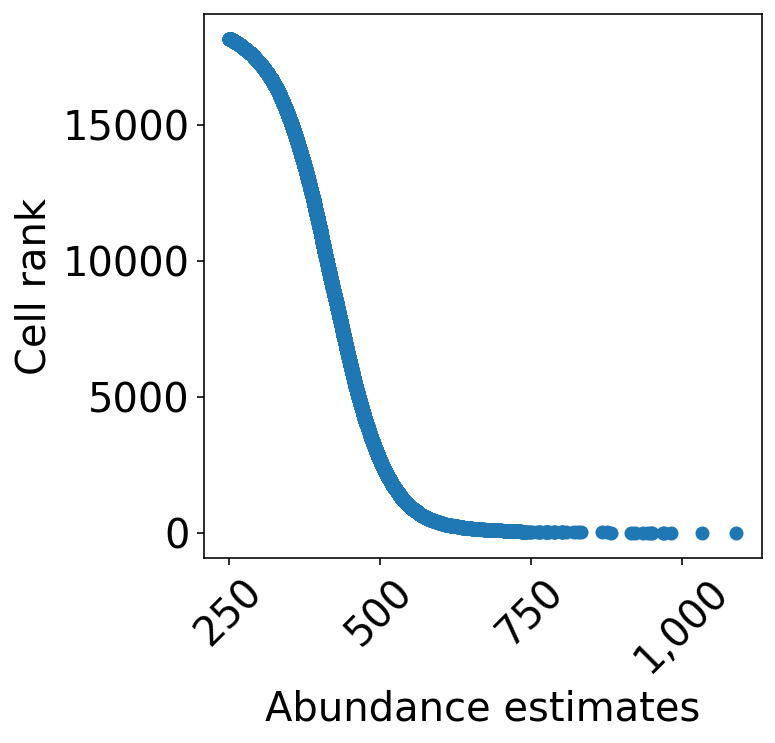

In [91]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(np.sort(x)[::-1], np.arange(x.shape[0]))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    
ax.set(**{
    "xlabel": "Abundance estimates",
    "ylabel": "Cell rank",
})

fig.show()

## **END CHECKPOINT**

### TSVD on highly variable genes

In [92]:
print("TSVD on {:,} variable genes to {} components.".format(n_top_genes, num_PCA))

TSVD on 5,000 variable genes to 50 components.


In [93]:
# PCA
X = gene.X[:,hvg_mask]

tsvd = TruncatedSVD(n_components=num_PCA)
gene.obsm["X_pca"] = tsvd.fit_transform(X)

X = isoform.X[:,hvi_mask]

tsvd = TruncatedSVD(n_components=num_PCA)
isoform.obsm["X_pca"] = tsvd.fit_transform(X)

### Clustering

In [94]:
#from scanpy import tl

In [95]:
scanp.pp.neighbors(gene, n_neighbors=n_neighbors, n_pcs=num_PCA, random_state=state)
scanp.pp.neighbors(isoform, n_neighbors=n_neighbors, n_pcs=num_PCA, random_state=state)

In [96]:
scanp.tl.leiden(gene, random_state=state)
scanp.tl.leiden(isoform, random_state=state)

In [97]:
scanp.tl.louvain(gene, random_state=state)
scanp.tl.louvain(isoform, random_state=state)

## Dimensionality Reduction

In [98]:
# TSNE
X = gene.obsm["X_pca"]

tsne = TSNE(n_components=num_TSNE, metric=metric, random_state=state)
gene.obsm["X_pca_tsne"] = tsne.fit_transform(X)

X = isoform.obsm["X_pca"]

tsne = TSNE(n_components=num_TSNE, metric=metric, random_state=state)
isoform.obsm["X_pca_tsne"] = tsne.fit_transform(X)

In [99]:
#test
gene.obs

,cell_id,cluster_id,cluster_label,subclass_id,subclass_label,region_label,class_label,cluster_color,class_id,cell_counts,percent_mito,n_genes,pass_count_filter,leiden,louvain
0,SM-GE5TN_S001_E1-50,345,345_CA1,1,CA1-ProS,HIP,Glutamatergic,#680DFF,1,286.215515,2.001043,11329,True,5,6
1,SM-GE5TN_S002_E1-50,362,362_DG,6,DG,HIP,Glutamatergic,#3447B9,1,295.613159,2.276559,8265,True,0,0
2,SM-GE5TN_S003_E1-50,333,333_CA1-ProS,1,CA1-ProS,HIP,Glutamatergic,#8274BF,1,275.008270,1.412877,10184,True,5,6
3,SM-GE5TN_S004_E1-50,330,330_CA1-ProS,1,CA1-ProS,HIP,Glutamatergic,#8883C0,1,312.885132,1.964671,10989,True,5,6
4,SM-GE5TN_S005_E1-50,337,337_CA1,1,CA1-ProS,HIP,Glutamatergic,#A68CFF,1,350.497681,1.713655,9950,True,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690-1,SM-GE8ZJ_S302_E1-50,223,223_L6 IT CTX,23,L6 IT CTX,RSP,Glutamatergic,#7F833B,1,471.582245,3.387203,9588,True,12,3
1691-1,SM-GE8ZJ_S303_E1-50,166,166_L2/3 IT CTX,10,L2/3 IT CTX,RSP,Glutamatergic,#00FF34,1,493.948547,3.096424,10044,True,6,7
1692-1,SM-GE8ZJ_S304_E1-50,193,193_L4/5 IT CTX,16,L4/5 IT CTX,RSP,Glutamatergic,#58D2C1,1,563.157471,3.218479,9089,True,11,3
1693-1,SM-GE91P_S383_E1-50,168,168_L2/3 IT CTX,10,L2/3 IT CTX,RSP,Glutamatergic,#02F970,1,372.662445,3.144827,9743,True,6,7


In [100]:
# NCA
X = gene.X
y = gene.obs.subclass_id.values

nca = NeighborhoodComponentsAnalysis(n_components=num_NCA,random_state=state)
gene.obsm["X_nca"] = nca.fit_transform(X, y)

In [101]:
# NCA
X = isoform.X
y = isoform.obs.subclass_id.values

nca = NeighborhoodComponentsAnalysis(n_components=num_NCA,random_state=state)
isoform.obsm["X_nca"] = nca.fit_transform(X, y)

In [102]:
X = gene.obsm["X_nca"]
tsne = TSNE(n_components=num_TSNE, metric=metric, random_state=state)
gene.obsm["X_nca_tsne"] = tsne.fit_transform(X)

In [103]:
X = isoform.obsm["X_nca"]
tsne = TSNE(n_components=num_TSNE, metric=metric, random_state=state)
isoform.obsm["X_nca_tsne"] = tsne.fit_transform(X)

In [104]:
gene.var.txn_list = gene.var.txn_list.astype('string')


In [105]:
isoform.write("../../data/notebook/revision/isoform.h5ad")
gene.write("../../data/notebook/revision/gene.h5ad")

## Saving

In [106]:
# gene = anndata.read_h5ad("cell_ranger_annotation/gene.h5ad")

In [107]:
isoform

AnnData object with n_obs × n_vars = 18175 × 81527
    obs: 'cell_id', 'cluster_id', 'cluster_label', 'subclass_id', 'subclass_label', 'region_label', 'class_label', 'cluster_color', 'class_id', 'cell_counts', 'leiden', 'louvain'
    var: 'transcript_id', 'gene_id', 'gene_name', 'transcript_name', 'length', 'gene_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'neighbors', 'leiden', 'louvain'
    obsm: 'X_pca', 'X_pca_tsne', 'X_nca', 'X_nca_tsne'
    layers: 'raw', 'scaled', 'norm', 'log1p'
    obsp: 'distances', 'connectivities'

In [108]:
isoform[:, isoform.var["gene_name"].str.contains("Tcea1")].layers["log1p"].todense()[0:10]

matrix([[2.09867427, 4.57672482, 0.        ],
        [0.        , 2.68718734, 0.        ],
        [1.89697049, 4.30580864, 2.91801867],
        [1.8959258 , 4.03174669, 0.        ],
        [2.73632382, 3.78069675, 0.        ],
        [0.        , 4.37154064, 0.        ],
        [0.        , 3.33809514, 3.81580112],
        [0.        , 4.85806931, 0.        ],
        [0.        , 4.28102251, 4.36236437],
        [0.        , 4.75153376, 2.27102201]])

In [109]:
isoform[:, isoform.var["gene_name"].str.contains("Tcea1")].X[0:10]

ArrayView([[ 1.45728918,  0.29133184, -0.44849186],
           [-0.52683046, -1.77349393, -0.44849186],
           [ 1.26659526, -0.00471664,  2.24302826],
           [ 1.26560759, -0.30420273, -0.44849186],
           [ 2.06013309, -0.57854203, -0.44849186],
           [-0.52683046,  0.06711317, -0.44849186],
           [-0.52683046, -1.06220283,  3.07112423],
           [-0.52683046,  0.59877605, -0.44849186],
           [-0.52683046, -0.03180213,  3.57526288],
           [-0.52683046,  0.48235742,  1.64625191]])

# Loading back in

In [110]:
gene = anndata.read_h5ad("../../data/notebook/revision/gene.h5ad")
#error with saving gene above... need to figure that out #nick
isoform = anndata.read_h5ad("../../data/notebook/revision/isoform.h5ad")

# Plotting

### TSNE on PCA components

In [111]:
print("Number of PCs: {}".format(num_PCA))

Number of PCs: 50


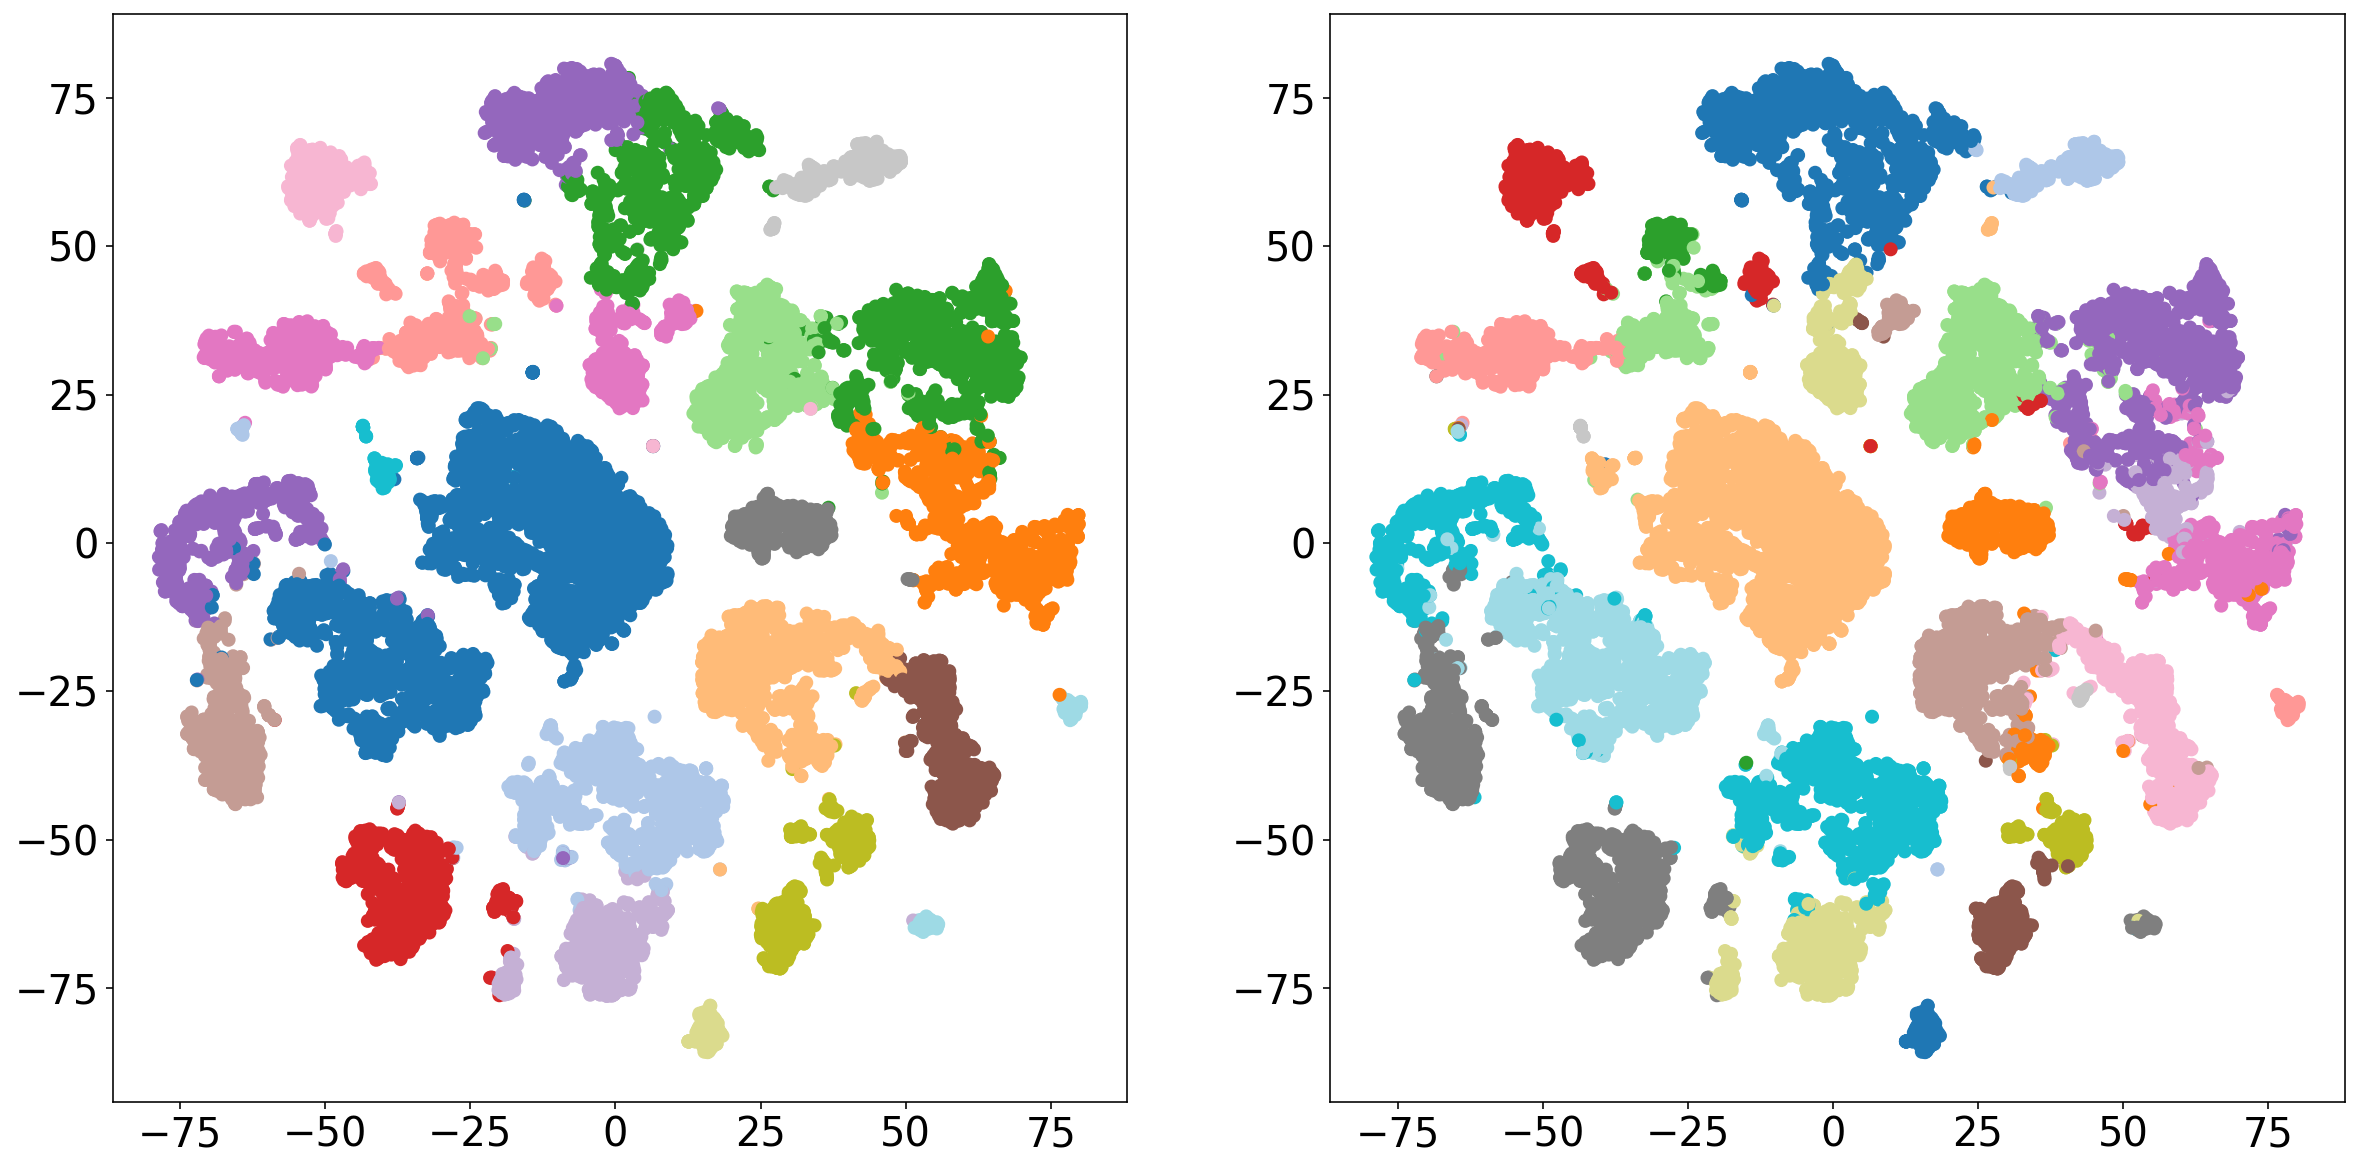

In [112]:
fig, ax = plt.subplots(figsize=(20,10), ncols=2)

x = gene.obsm["X_pca_tsne"][:,0]
y = gene.obsm["X_pca_tsne"][:,1]
c = gene.obs["louvain"].astype(int)

ax[0].scatter(x, y, c = c, cmap='tab20')

x = gene.obsm["X_pca_tsne"][:,0]
y = gene.obsm["X_pca_tsne"][:,1]
c = gene.obs["subclass_id"].astype(int)

ax[1].scatter(x, y, c = c, cmap='tab20')

plt.show()

In [113]:
adjusted_rand_score(gene.obs["louvain"].values, gene.obs["subclass_id"].values)

0.8169277276706537

### TSNE on NCA (trained on subclass_labels)

In [114]:
print("Number of NCs: {}".format(num_NCA))

Number of NCs: 10


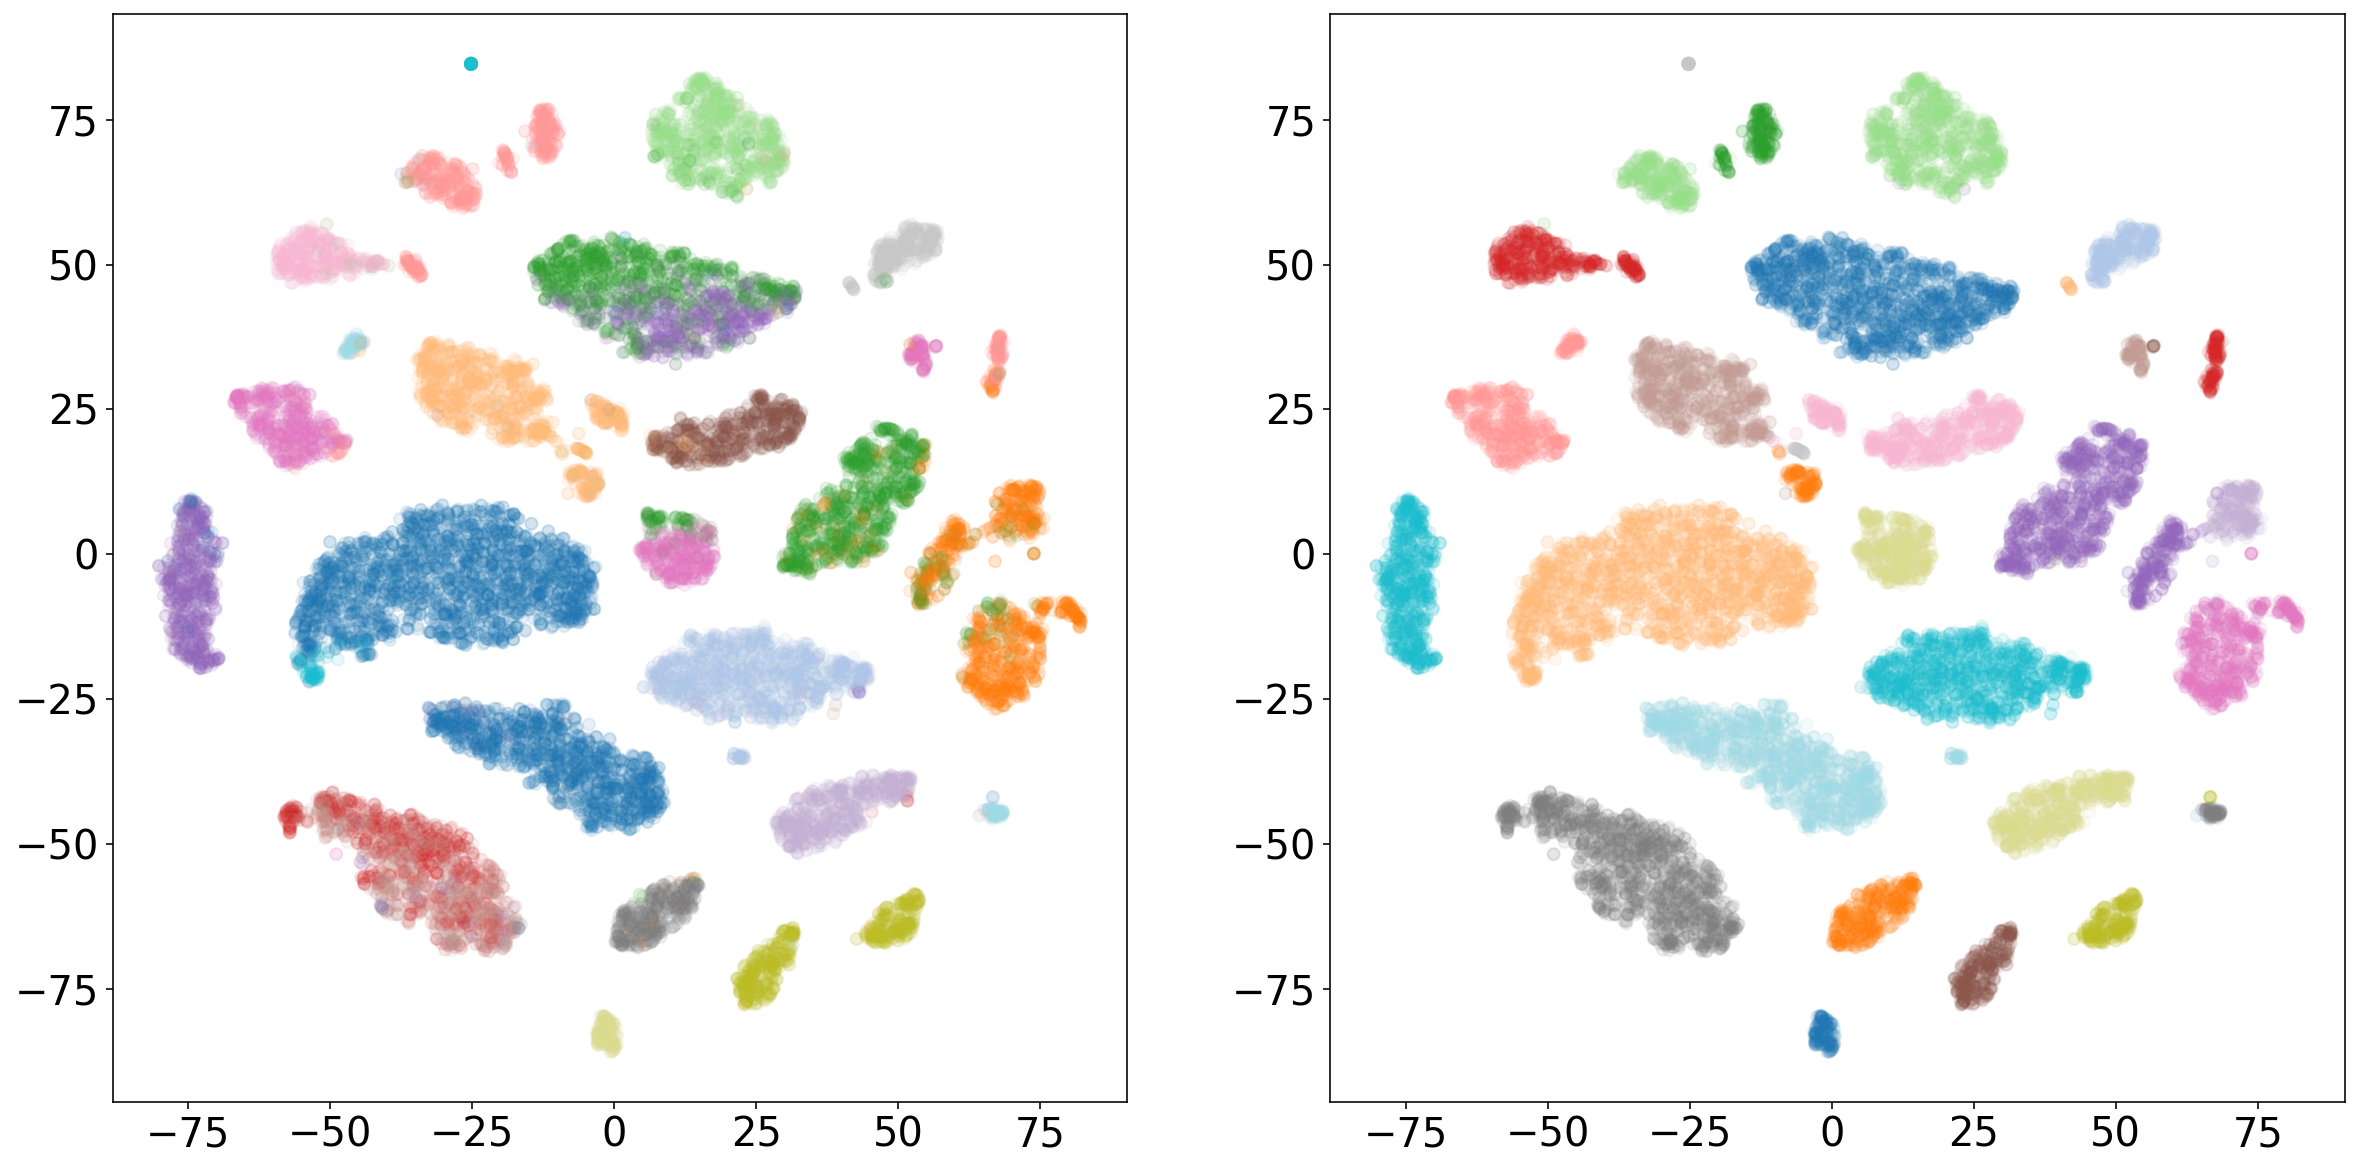

In [115]:
fig, ax = plt.subplots(figsize=(20,10), ncols=2)

x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]
c = gene.obs["louvain"].astype(int)

ax[0].scatter(x, y, c = c, cmap='tab20', alpha=0.1)

x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]
c = gene.obs["subclass_id"].astype(int)

ax[1].scatter(x, y, c = c, cmap='tab20', alpha=0.1)

plt.show()

# Annotate clusters

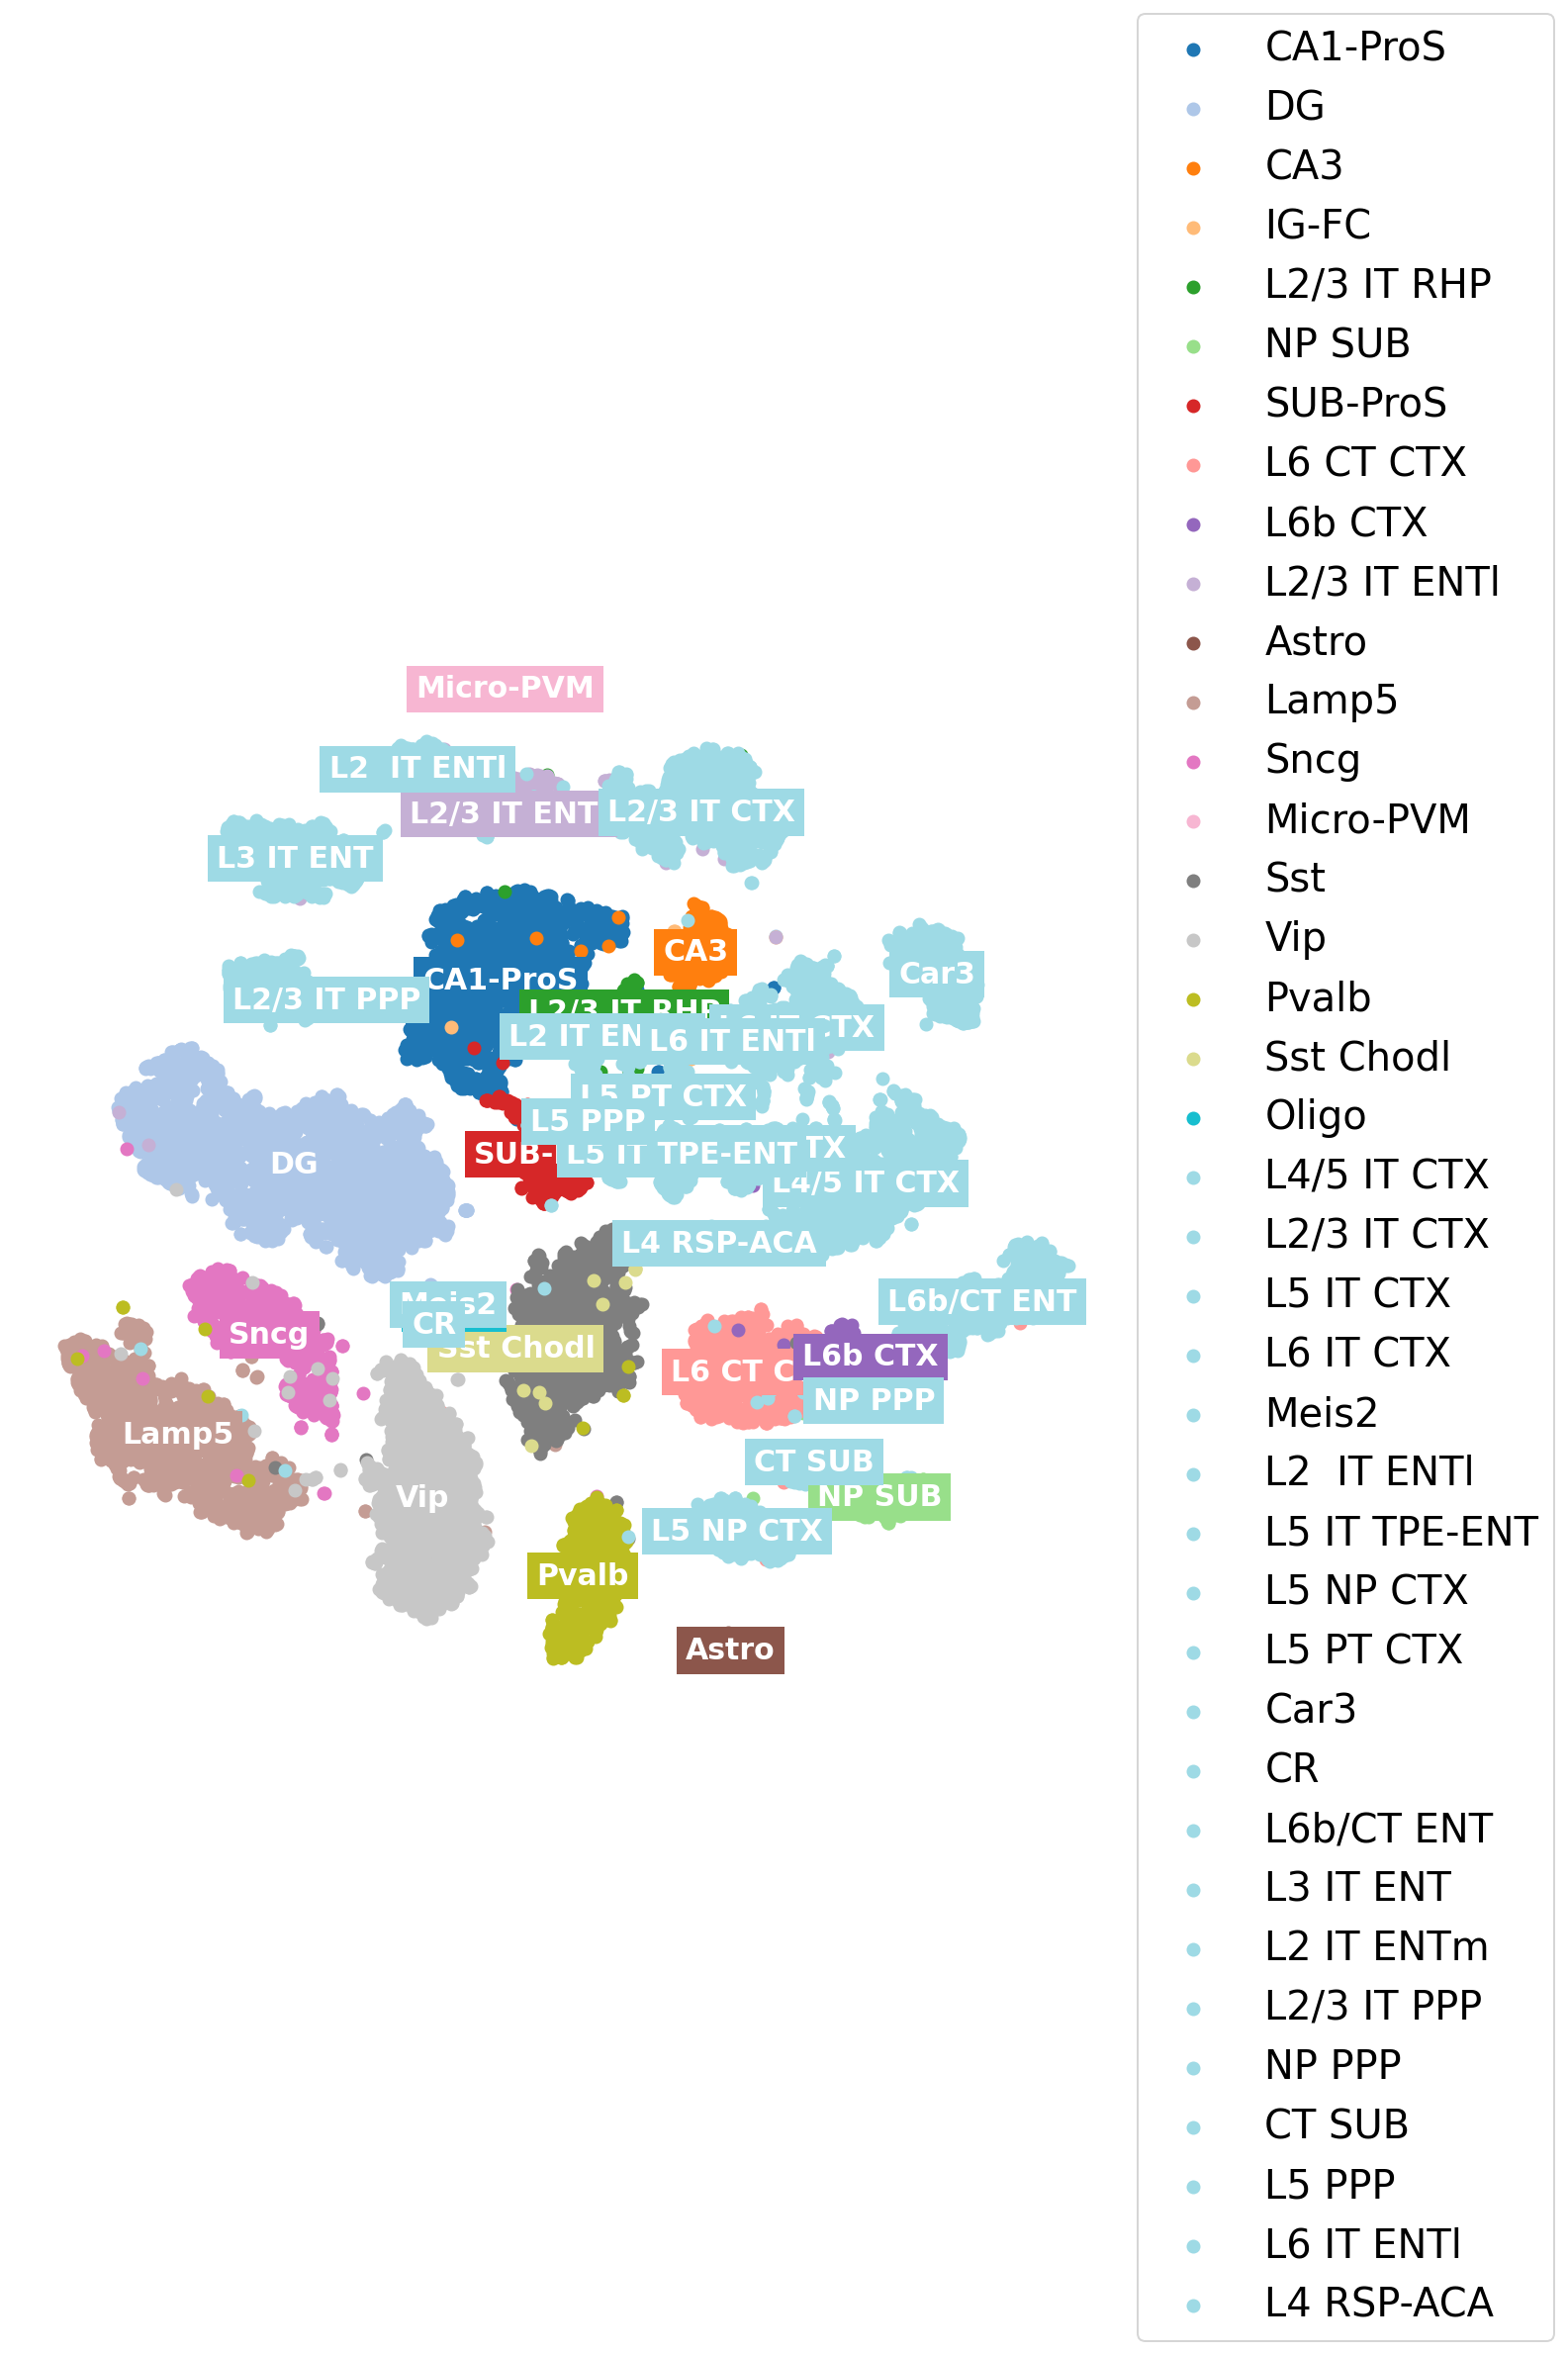

In [116]:
fig, ax = plt.subplots(figsize=(10,10))

c = isoform.obs["subclass_label"].unique().astype(str)
cmap = cm.get_cmap("tab20")

for idx, cluster in enumerate(c):
    XX = isoform[isoform.obs.subclass_label == cluster,:].obsm["X_nca_tsne"]
    
    x = XX[:,0]
    y = XX[:,1]
    if cluster == "Endo": y = y-10
    if cluster == "SMC": y = y+5; x=x+5
    ax.scatter(x, y, color = cmap(idx), label=cluster)
    ax.annotate(cluster, 
             (np.mean(x), np.mean(y)),
             horizontalalignment='center',
             verticalalignment='center',
             size=15, weight='bold',
             color="white",
               backgroundcolor=cmap(idx)) 
    

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_axis_off()
plt.show()

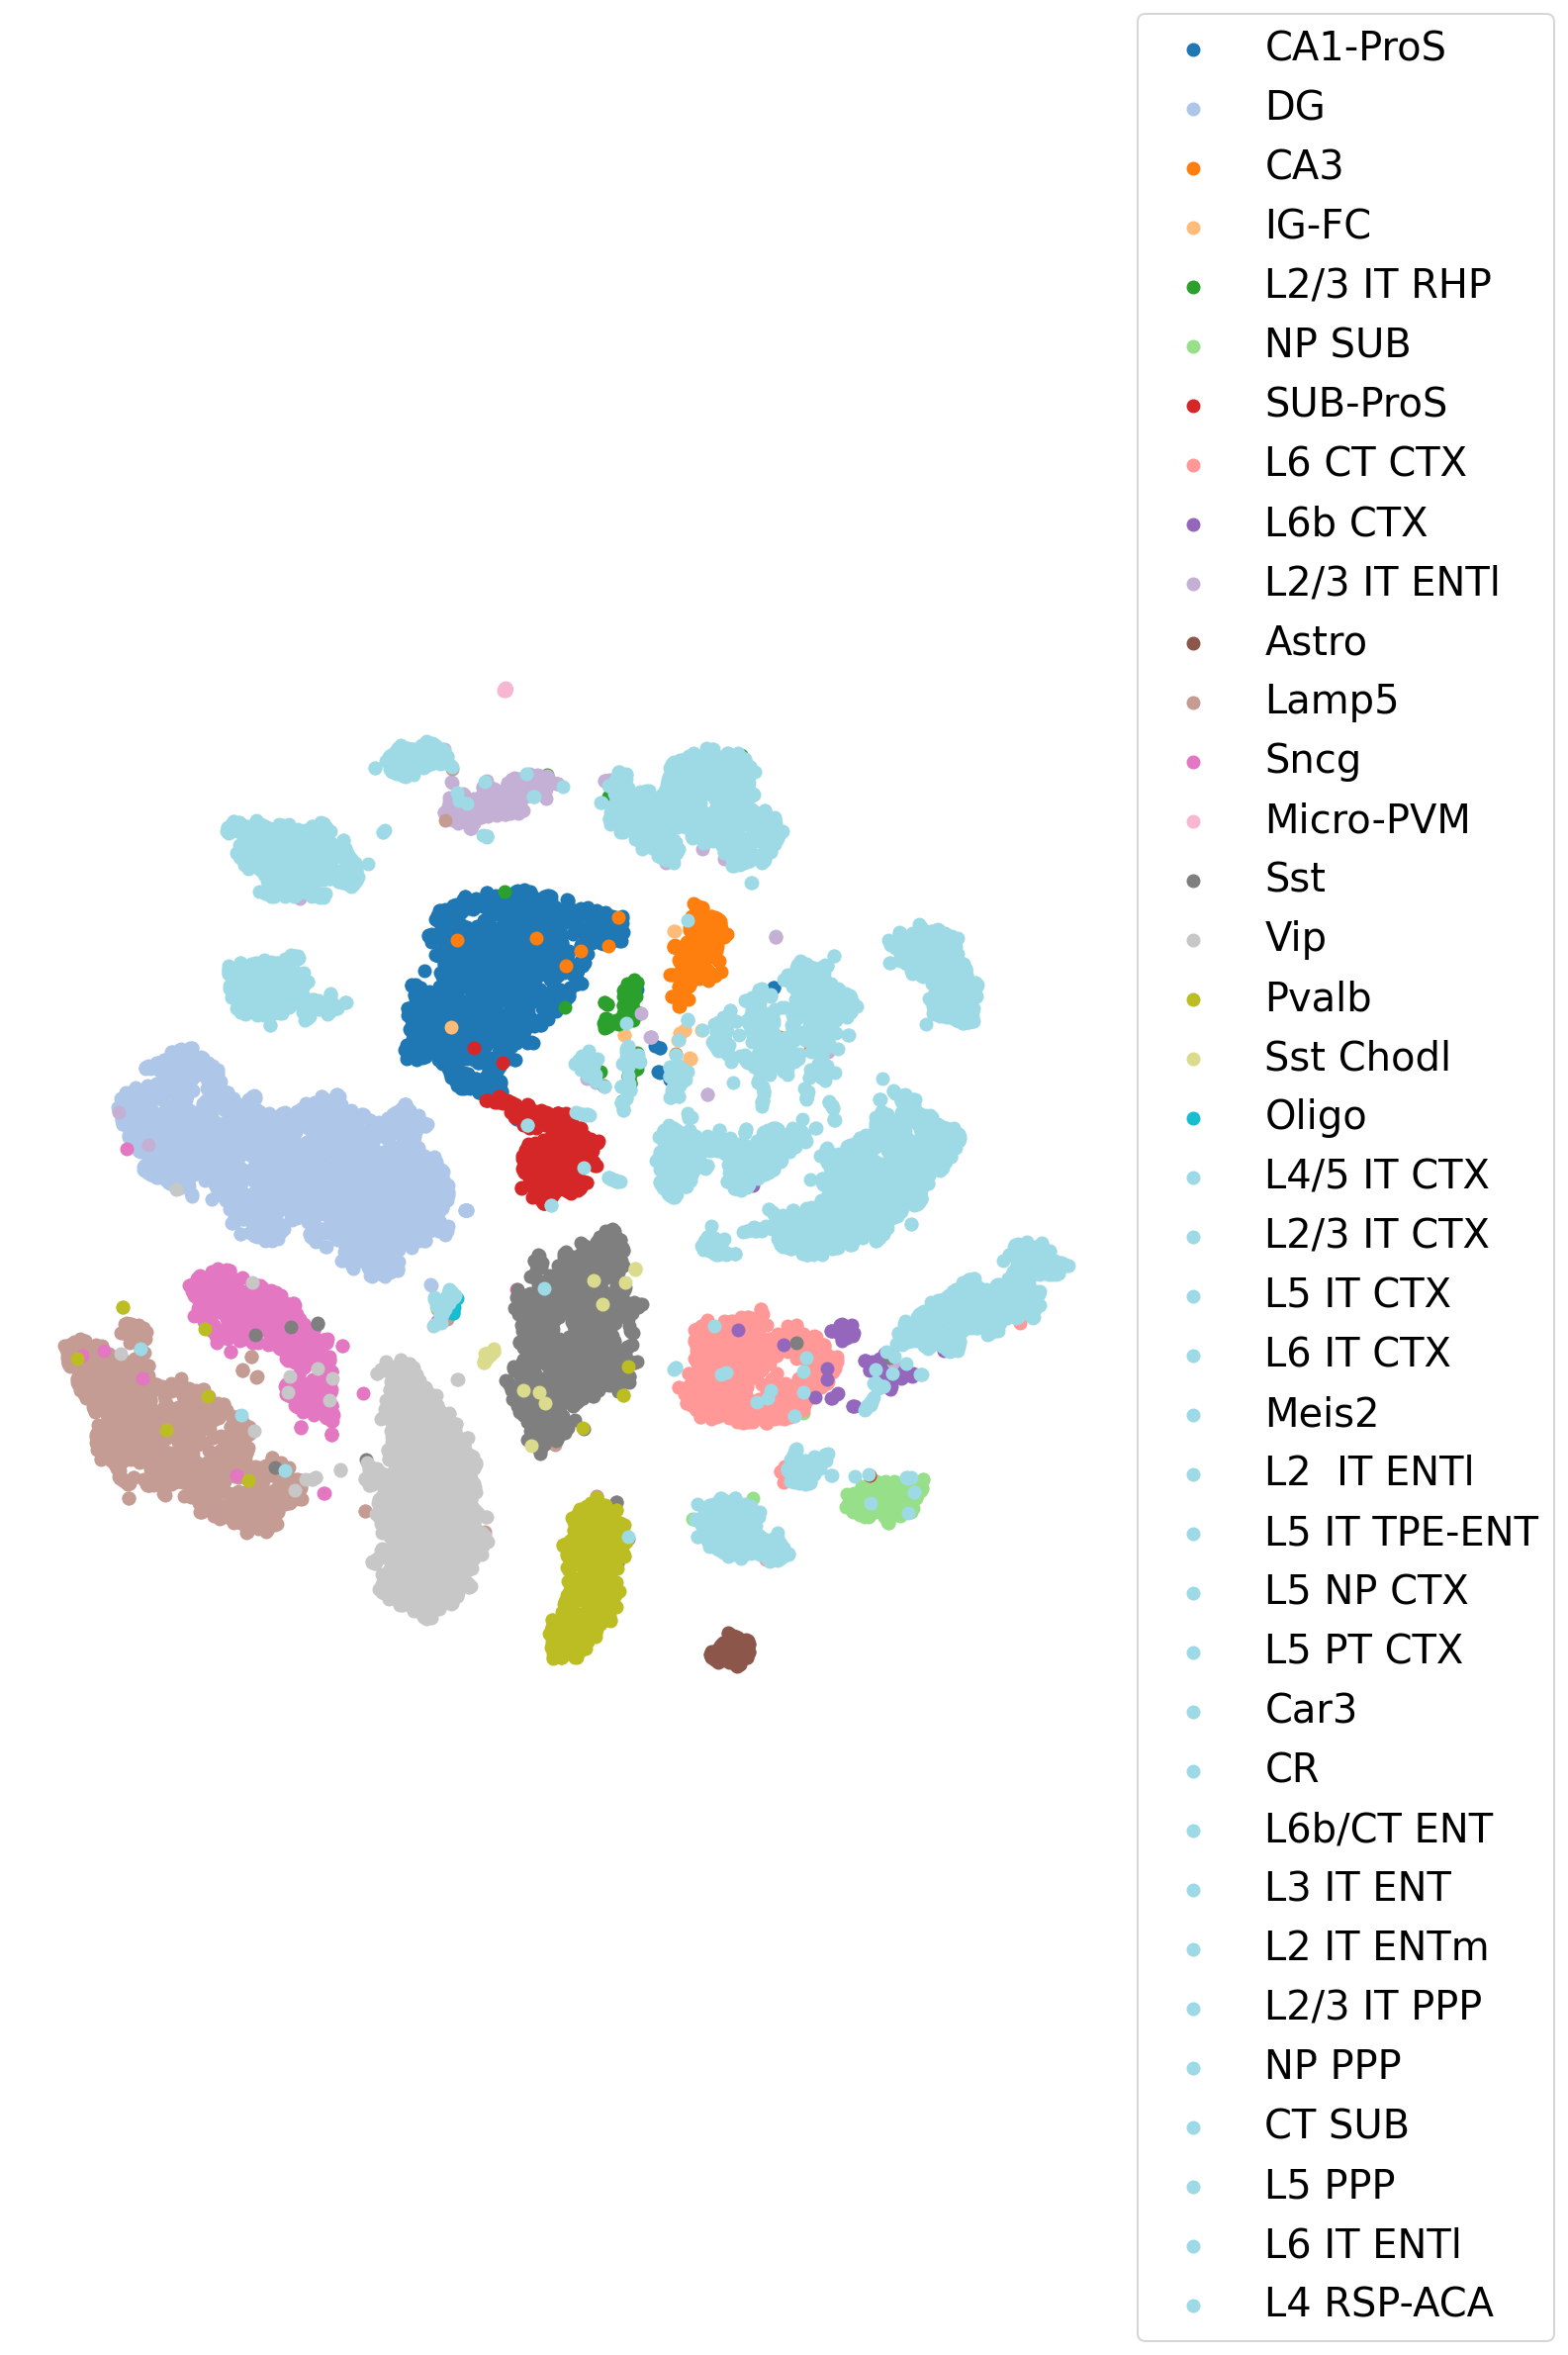

In [117]:
fig, ax = plt.subplots(figsize=(10,10))

c = isoform.obs["subclass_label"].unique().astype(str)
cmap = cm.get_cmap("tab20")

for idx, cluster in enumerate(c):
    XX = isoform[isoform.obs.subclass_label == cluster,:].obsm["X_nca_tsne"]
    
    x = XX[:,0]
    y = XX[:,1]
    if cluster == "Endo": y = y-10
    if cluster == "SMC": y = y+5; x=x+5
    ax.scatter(x, y, color = cmap(idx), label=cluster)
    #ax.annotate(cluster, 
    #         (np.mean(x), np.mean(y)),
    #         horizontalalignment='center',
    #         verticalalignment='center',
    #         size=15, weight='bold',
    #         color="white",
    #           backgroundcolor=cmap(idx)) 
    

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_axis_off()
plt.show()

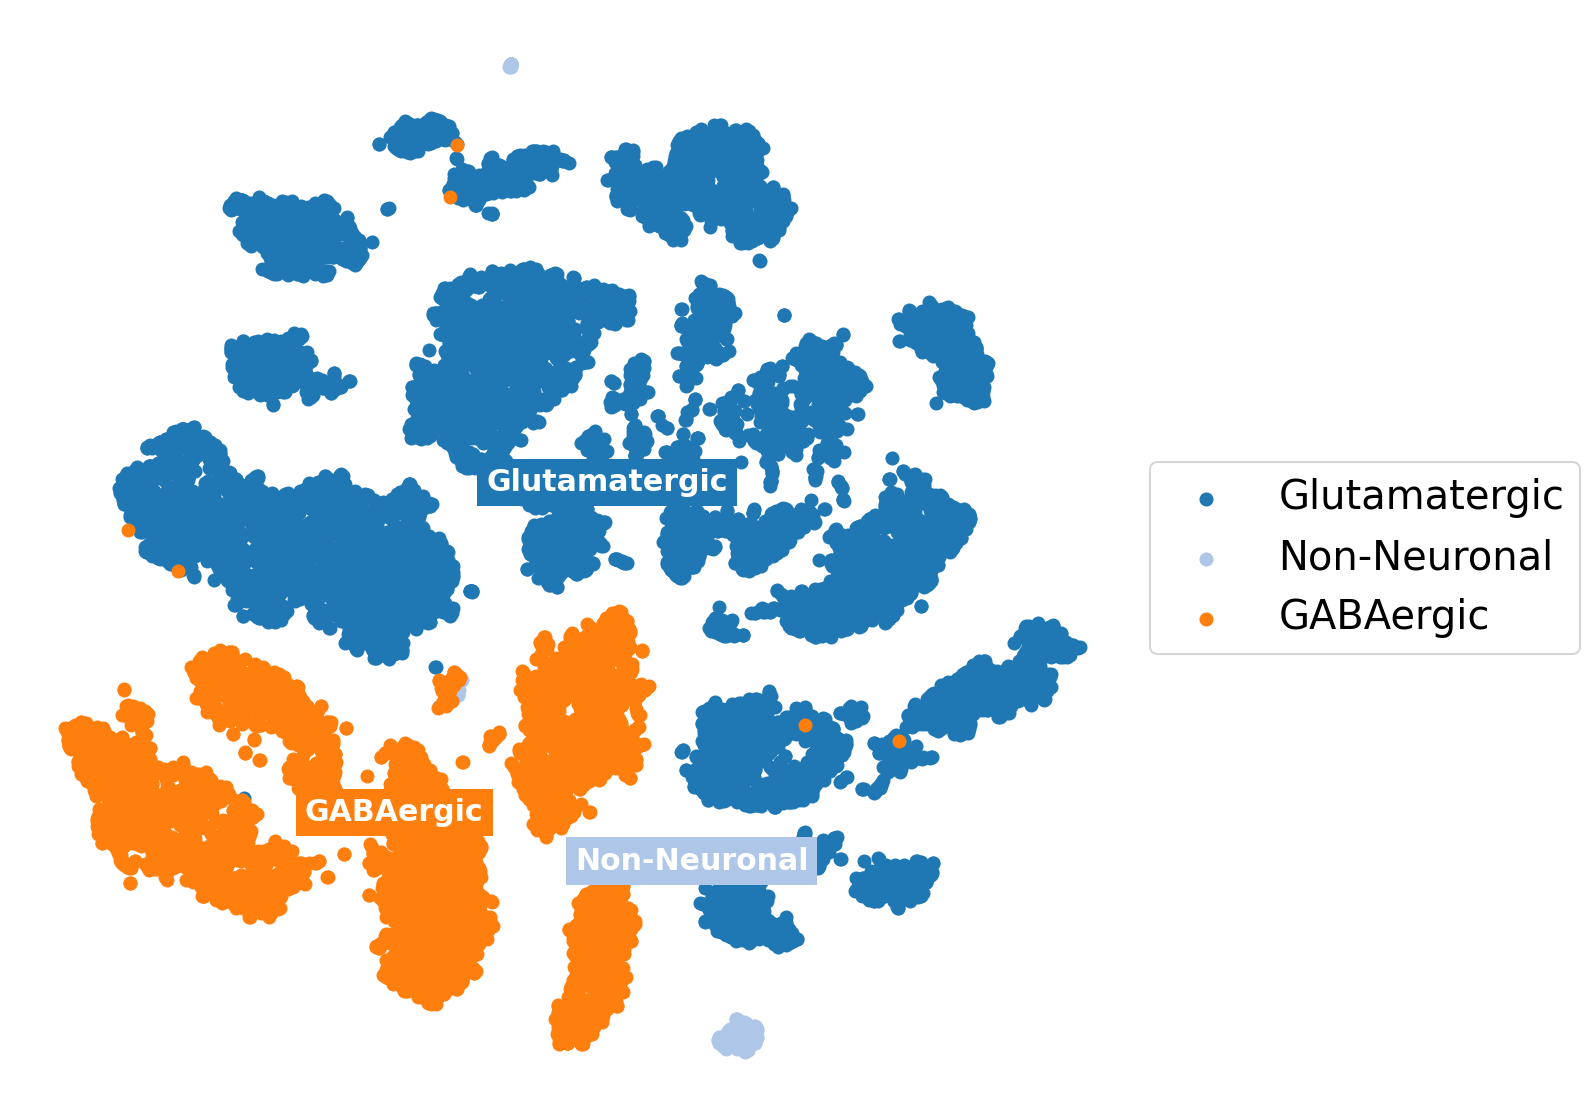

In [118]:
fig, ax = plt.subplots(figsize=(10,10))

c = isoform.obs["class_label"].unique()
cmap = cm.get_cmap("tab20")

for idx, cluster in enumerate(c):
    XX = isoform[isoform.obs.class_label == cluster,:].obsm["X_nca_tsne"]
    
    x = XX[:,0]
    y = XX[:,1]
    
    ax.scatter(x, y, color = cmap(idx), label=cluster)
    ax.annotate(cluster, 
             (np.mean(x), np.mean(y)),
             horizontalalignment='center',
             verticalalignment='center',
             size=15, weight='bold',
             color="white",
               backgroundcolor=cmap(idx)) 
    

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_axis_off()
plt.show()

In [119]:
adata.layers["raw"].sum(axis=1)

matrix([[471560.  ],
        [428214.  ],
        [528288.  ],
        ...,
        [749949.06],
        [510823.  ],
        [455598.97]], dtype=float32)